# Logistic regression


You saw it in the theoretical part, logistic regression is no regression, but classification. The logistic function to fit on our data is :

$g(z)=\frac{L}{1-e^{-k(z-z_0)}}$

In logistic regression, we always have $L=1$. $f(x)$ then gives the probability for being one or the other of two states given $x$ (those states could be "dead" or "alive" given the age in medecin statistical studies for instance).

$k$ is the "coefficient", coding for the width of the transition part, and $x_0$ is the "intercept", the coordinate with $f(x_0)=L/2$.

## Imports

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Make data

We start by creating a toy dataset

In [2]:
def logpdf(x, x0=0, k=1):
    return 1 / (1+np.exp(-k*(x - x0)))

def make_y(x, x0=0, k=1):
    p = logpdf(x, x0, k=k)
    rand = np.random.uniform(size=x.size)
    return p > rand

In [3]:
x0 = 4
k = 2
x = np.linspace(-10, 10, 100)
y = make_y(x, x0, k)

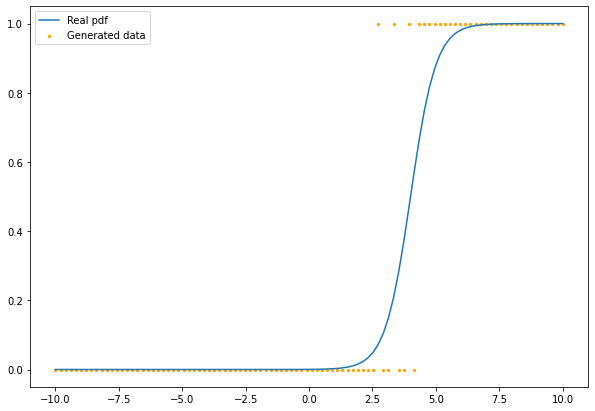

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(x, logpdf(x, x0, k), label="Real pdf")
ax.scatter(x, y, label="Generated data", color="orange", s=5)
ax.legend()

## Regression

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [6]:
model = LogisticRegression()
model.fit(x_train.reshape(-1, 1), y_train)
score = round(model.score(x_test.reshape(-1, 1), y_test), 3)
predict = model.predict_proba(x.reshape(-1, 1))[:, 1]

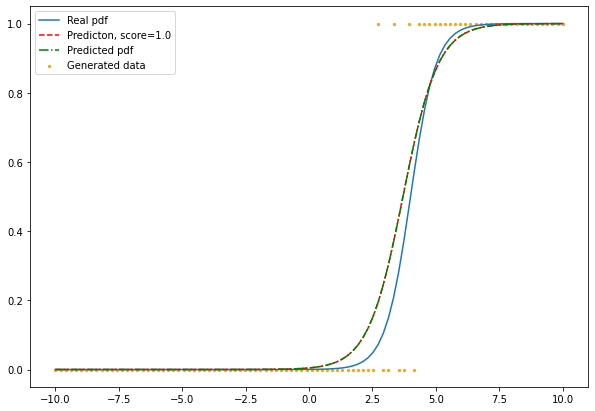

In [7]:
plt.close("all")
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(x, logpdf(x, x0, k), label="Real pdf")
ax.scatter(x, y, label="Generated data", color="orange", s=5)
ax.plot(x, predict, label=f"Predicton, score={score}", color="red", ls="--")
ax.plot(x, logpdf(x, -model.intercept_[0]/model.coef_[0][0], model.coef_[0][0]), label=f"Predicted pdf", color="green", ls="-.")
ax.legend()

In [8]:
model.coef_[0][0]

1.451120790982335

In [9]:
- model.intercept_[0] / model.coef_[0][0]

3.7018233524685686